<a href="https://colab.research.google.com/github/mleyvaz/AV/blob/master/desercion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pycaret

     |████████████████████████████████| 266kB 4.4MB/s 
     |████████████████████████████████| 14.2MB 293kB/s 
     |████████████████████████████████| 245kB 44.3MB/s 
     |████████████████████████████████| 102kB 9.1MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 1.8MB 38.5MB/s 
     |████████████████████████████████| 276kB 33.1MB/s 
     |████████████████████████████████| 1.7MB 50.9MB/s 
     |████████████████████████████████| 215kB 48.4MB/s 
     |████████████████████████████████| 6.8MB 40.9MB/s 
     |████████████████████████████████| 1.1MB 36.7MB/s 
     |████████████████████████████████| 163kB 44.9MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 81kB 8.8MB/s 
     |████████████████████████████████| 153kB 51.9MB/s 
     |████████████████████████████████| 604kB 47.4MB/s 
     |████████████████████████████████| 3.1MB 43.0MB/s 
     |████████████████████████████████| 81kB 8.9MB/s 
  

In [2]:
pip install shap

     |████████████████████████████████| 358kB 4.1MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491628 sha256=8535992618fa2b9c60dbdc5e3fc80746c982decf6a43b76be49d31fed72ca902
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [3]:
from pycaret.utils import enable_colab
enable_colab()
import pandas as pd
import seaborn as sns

Colab mode enabled.


In [4]:
url = "https://github.com/mleyvaz/escolar/blob/main/datosdesercion.xlsx?raw=true"
dataset = pd.read_excel(url)
dataset.head(10)

,razones,Score,Colegio,Algoritmo,nivelación,lógica,calificaría,buscaAlgoritmo?,preparado,procesos,herramienta algoritmo?,Unaaplicación,Unalgoritmo,UnGIGABYTES,convierta,base datos,capacitación,bachillerato?,desercion
0,Me agrada la carrera,3 / 10,Particular,Es la técnica utilizada para desarrollar instr...,Una oportunidad de equiparar conocimientos,Es la técnica utilizada para desarrollar instr...,8,Busca escribir la codificación de un programa ...,Tal vez,"Analizar, Resolver , codificar y Probar.",Diagrama de flujo.,Un pseudocódigo,Entornos,1 MB,10,Es un algoritmo de programación,SI,Informatica,1
1,Me agrada la carrera,6 / 10,Particular,Secuencia de instrucciones finitas que llevan ...,Una oportunidad de equiparar conocimientos,Es la técnica utilizada para desarrollar instr...,10,Ninguna de las anteriores.,Sí,"Analizar, Resolver , codificar y Probar.",Diagrama de flujo.,"Un grupo de funciones, tareas o actividades pa...",Procesadores,1000 MB,1001,Es un repositorio de almacenamiento,SI,Otra,0
2,Me agrada la carrera,4 / 10,Fiscal,Secuencia de instrucciones finitas que llevan ...,Una oportunidad de equiparar conocimientos,"Ciencia que estudia la estructura, fundamentos...",10,Dar una solución a uno o más problemas.,Sí,"Resolver, codificar, probar, analizar.",Código en un lenguaje de programación.,"Un grupo de funciones, tareas o actividades pa...",Ensambladores,1 MB,1001,Es un repositorio de almacenamiento,NO,Otra,0
3,Me agrada la carrera,4 / 10,Fiscal,Secuencia de instrucciones finitas que llevan ...,Una oportunidad de equiparar conocimientos,Es la técnica utilizada para desarrollar instr...,10,Dar una solución a uno o más problemas.,Tal vez,"Resolver, codificar, probar, analizar.",Código en un lenguaje de programación.,Un pseudocódigo,Entornos,1000 MB,1,Es un repositorio de almacenamiento,NO,Contabilidad,0
4,Me agrada la carrera,3 / 10,Fiscal,Es la técnica utilizada para desarrollar instr...,Una oportunidad de equiparar conocimientos,Pasos a seguir,10,Dar una solución a uno o más problemas.,Sí,"Analizar, Resolver , codificar y Probar.",Código en un lenguaje de programación.,"Un grupo de funciones, tareas o actividades pa...",Procesadores,1000 MB,10,Es un algoritmo de programación,NO,Informatica,0
5,Me agrada la carrera,6 / 10,Fiscal,Es la técnica utilizada para desarrollar instr...,Una oportunidad de equiparar conocimientos,Es la técnica utilizada para desarrollar instr...,10,Busca escribir la codificación de un programa ...,Sí,"Analizar, Resolver , codificar y Probar.",Código en un lenguaje de programación.,"Un grupo de funciones, tareas o actividades pa...",Procesadores,1024 MB,1000,Es un repositorio de almacenamiento,SI,Otra,0
6,Me agrada la carrera,5 / 10,Fiscal,Es la técnica utilizada para desarrollar instr...,Una oportunidad de equiparar conocimientos,Es la técnica utilizada para desarrollar instr...,10,Dar una solución a uno o más problemas.,Sí,"Analizar, Resolver , codificar y Probar.",Diagrama de flujo.,"Un grupo de funciones, tareas o actividades pa...",Entornos,1000 MB,1001,Es un algoritmo de programación,NO,Informatica,0
7,Me agrada la carrera,4 / 10,Fiscal,Secuencia de instrucciones finitas que llevan ...,Una oportunidad de equiparar conocimientos,Es la técnica utilizada para desarrollar instr...,8,Busca escribir la codificación de un programa ...,Tal vez,"Probar, diagramar , codificar y resolver.",Código en un lenguaje de programación.,"Un grupo de funciones, tareas o actividades pa...",Procesadores,1000 MB,1,Es un repositorio de almacenamiento,NO,Otra,0
8,Única opción de estudio,8 / 10,Fiscal,Secuencia de instrucciones finitas que llevan ...,Una oportunidad de equiparar conocimientos,Es la técnica utilizada para desarrollar instr...,10,Busca escribir la codificación de un programa ...,Sí,"Analizar, Resolver , codificar y Probar.",Diagrama de flujo.,"Un grupo de funciones, tareas o actividades pa...",Acciones Primitivas,1024 MB,1000,Es una librería,NO,Informatica,0
9,Me agrada la carrera,4 / 10,Fiscal,Secuencia d

,calificaría,convierta,desercion
calificaría,1.000000,-0.069806,-0.125958
convierta,-0.069806,1.000000,-0.159740
desercion,-0.125958,-0.159740,1.000000


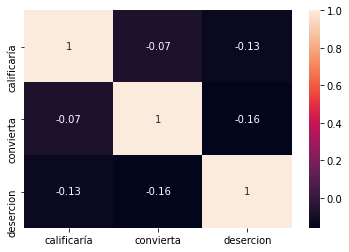

In [5]:
corrMatrix = dataset.corr()
sns.heatmap(corrMatrix, annot=True)
corrMatrix

In [6]:
# Importing dataset
from pycaret.datasets import get_data


# Importing module and initializing setup
from pycaret.classification import *
clf1 = setup(data = dataset, target = 'desercion', fix_imbalance = True)

,Description,Value
0,session_id,990
1,Target,desercion
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(374, 19)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,18
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
# return top 3 models based on 'Accuracy'
top3 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9886,0.9976,1.0000,0.9780,0.9886,0.9772,0.9780,0.484
et,Extra Trees Classifier,0.9808,1.0000,1.0000,0.9647,0.9814,0.9615,0.9634,0.478
gbc,Gradient Boosting Classifier,0.9198,0.9722,0.9840,0.8745,0.9239,0.8399,0.8511,0.115
dt,Decision Tree Classifier,0.9161,0.9184,1.0000,0.8621,0.9233,0.8330,0.8492,0.035
lightgbm,Light Gradient Boosting Machine,0.8963,0.9758,0.9609,0.8501,0.8999,0.7932,0.8042,0.054
lr,Logistic Regression,0.7859,0.7887,0.8391,0.7476,0.7869,0.5717,0.5822,0.312
lda,Linear Discriminant Analysis,0.7819,0.7806,0.8962,0.7207,0.7970,0.5660,0.5876,0.038
ridge,Ridge Classifier,0.7745,0.0000,0.8635,0.7252,0.7856,0.5506,0.5653,0.032
ada,Ada Boost Classifier,0.7630,0.8091,0.8218,0.7242,0.7633,0.5249,0.5386,0.120
knn,K Neighbors Classifier,0.7546,0.8437,0.8571,0.7043,0.7702,0.5118,0.5295,0.131


In [8]:
rf = create_model('rf') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9630,1.0000,1.0,0.9286,0.9630,0.9260,0.9286
1,0.9615,0.9763,1.0,0.9286,0.9630,0.9231,0.9258
2,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000
7,0.9615,1.0000,1.0,0.9231,0.9600,0.9231,0.9258
8,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000


In [9]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8889,0.9725,1.0000,0.8125,0.8966,0.7793,0.7990
1,0.7692,0.8402,0.6923,0.8182,0.7500,0.5385,0.5449
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9615,0.9763,1.0000,0.9286,0.9630,0.9231,0.9258
4,0.8846,0.9467,0.9231,0.8571,0.8889,0.7692,0.7715
5,0.9615,1.0000,1.0000,0.9286,0.9630,0.9231,0.9258
6,0.9231,0.9762,1.0000,0.8571,0.9231,0.8471,0.8571
7,0.9231,0.9345,0.9167,0.9167,0.9167,0.8452,0.8452
8,0.9615,1.0000,1.0000,0.9231,0.9600,0.9231,0.9258
9,0.8077,0.9464,0.5833,1.0000,0.7368,0.6012,0.6556


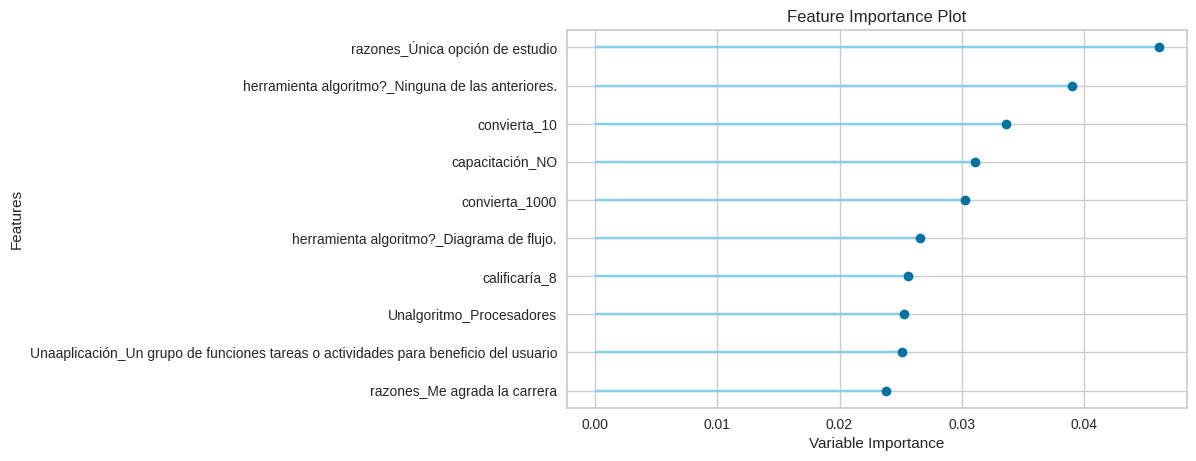

In [10]:
plot_model(tuned_rf, plot='feature')

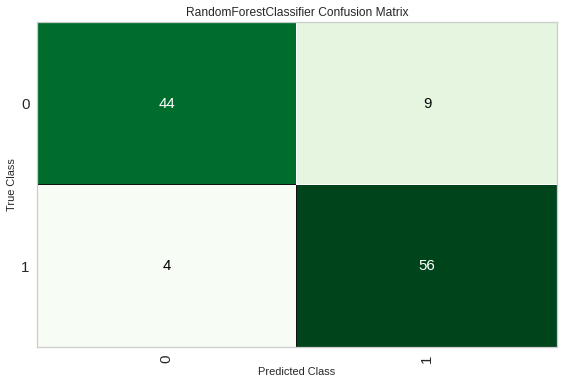

In [11]:
plot_model(tuned_rf, plot='confusion_matrix')

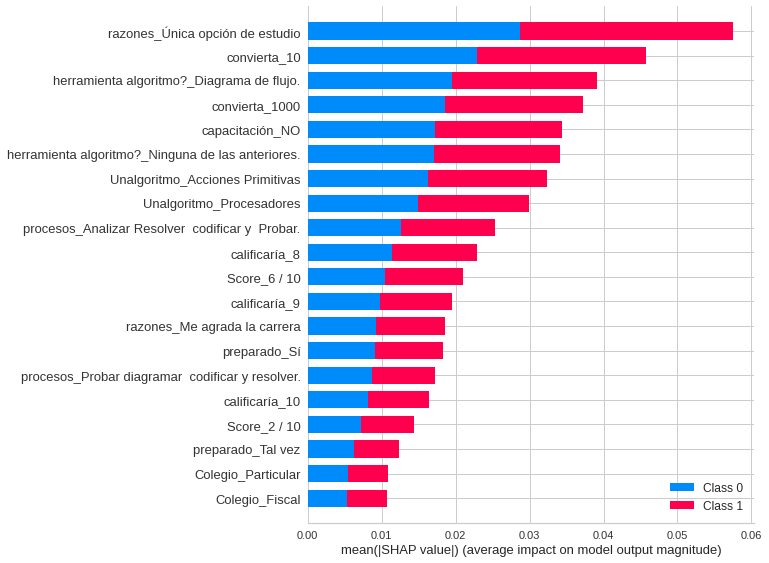

In [12]:
interpret_model(tuned_rf)

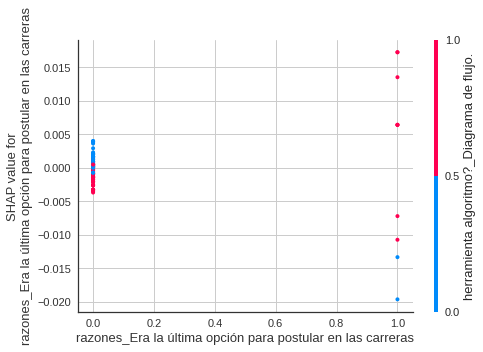

In [13]:
interpret_model(tuned_rf, plot = 'correlation')

In [14]:
interpret_model(tuned_rf, plot = 'reason', observation = 10)